In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d.axes3d import Axes3D
from pylab import figure, show
import random

In [481]:
class RegresionLineal(object):
    def __init__(self):
        pass
    
    def predecir(self, X, w):
        return X@w
    
    def ECM(self, y_real, y_pred):
        self.e = (y_real - y_pred)**2
        self.error = np.mean(self.e)/float(2)
        return self.error
    
    def GenerarPesos(self, x):
        self.w = np.array([[],[]])
        for i in range(x.shape[1]):
            self.aleatorio = random.randint(0,9)
            self.w = np.append(self.w, self.aleatorio)
        self.w = np.expand_dims(self.w, axis = 1)
        return self.w
    
    def Entrenar(self, X, y_real, w, ra, iterar): #ra --->Radio de aprendizaje
        self.X = X
        self.y_real = y_real
        self.ra = ra
        self.w = w
        self.Ecm = np.zeros((iterar), float)
        for i in np.arange(iterar):
            self.y_pred = self.predecir(self.X,self.w)
            self.grad = self.CalcularGradiente(self.X, self.y_real, self.w)
            self.w = self.w - ra*self.grad
            self.Ecm[i] = self.ECM(self.y_real,self.y_pred)
        return (self.w, self.Ecm)
    
    def EntrenarMomento(self, X, y_real, w, ra, momento, iterar): #ra --->Radio de aprendizaje
        self.X = X
        self.y_real = y_real
        self.ra = ra
        self.w = w
        self.momento = momento
        self.deltaw_1 = np.zeros(self.w.shape, float)
        self.Ecm = np.zeros((iterar), float)
        for i in np.arange(iterar):
            self.y_pred = self.predecir(self.X,self.w)
            self.grad = self.CalcularGradiente(self.X, self.y_real, self.w)
            self.deltaw = self.ra*self.grad + self.momento*self.deltaw_1
            self.w = self.w - self.deltaw
            self.deltaw_1 = self.deltaw
            self.Ecm[i] = self.ECM(self.y_real,self.y_pred)
        return (self.w, self.Ecm)
    
    def EntrenarRMSPROP(self, X, y_real, w, ra, iterar): #ra --->Radio de aprendizaje
        self.X = X
        self.y_real = y_real
        self.ra = ra
        self.w = w
        self.Ecm = np.zeros((iterar), float)
        self.vt = np.zeros(self.w.shape, float)
        for i in np.arange(iterar):
            self.y_pred = self.predecir(self.X,self.w)
            self.grad = self.CalcularGradiente(self.X, self.y_real, self.w)
            self.vt = 0.99*self.vt + (1.0-0.99)*(self.grad**2)
            self.w = self.w - (ra/(np.sqrt(self.vt) + 1e-6))*self.grad
            self.Ecm[i] = self.ECM(self.y_real,self.y_pred)
        return (self.w, self.Ecm)
    
    def EntrenarADAM(self, X, y_real, w, ra, iterar): #ra --->Radio de aprendizaje
        self.X = X
        self.y_real = y_real
        self.ra = ra
        self.w = w
        self.Ecm = np.zeros((iterar), float)
        self.vt = np.zeros(self.w.shape, float)
        self.mt = np.zeros(self.w.shape, float)
        for i in np.arange(iterar):
            self.y_pred = self.predecir(self.X,self.w)
            self.grad = self.CalcularGradiente(self.X, self.y_real, self.w)
            self.vt = 0.9*self.vt + (1.0-0.9)*(self.grad**2)
            self.mt = 0.999*self.mt + (1.0-0.999)*(self.grad)
            self.w = self.w - (ra/(np.sqrt(self.vt) + 1e-6))*self.mt
            self.Ecm[i] = self.ECM(self.y_real,self.y_pred)
        return (self.w, self.Ecm)
             
    def CalcularGradiente(self, X, y_real, w):
        y_pred = self.predecir(X, w)
        grad = (1/float(len(y_pred)))*(X.T@(y_pred-y_real))
        return grad

    def NormalizarCaract(self, X):
        self.X = X
        for i in np.arange(X.shape[1]-1):  
            mu = np.mean(self.X[:,i])
            sigma = np.std(self.X[:,i], ddof=1)
            aux = (self.X[:,i] - mu)/sigma
            aux = np.expand_dims(aux, axis = 1)
            self.X[:,i] = aux.T
        
        return self.X

    def NormalizarEtiquetas(self, y):
        for i in np.arange(y.shape[1]):
            self.y = y
            mu = np.mean(self.y[:,i])
            sigma = np.std(self.y[:,i], ddof=1)
            aux = (self.y[:,i] - mu)/sigma
            aux = np.expand_dims(aux, axis = 1)
            self.y[:,i] = aux.T
            
        return self.y

    def Normalizar_una_Caract(self, x, media, stnd):
        self.x = x
        self.norm = np.ones((1, self.x.size), dtype=float)
        for i in np.arange(self.x.size-1):
            self.norm[0][i] = (self.x[i] - media[0][i])/stnd[0][i]
              
        return self.norm

In [219]:
cars_co2 = pd.read_csv('cars.csv')
cars_co2

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [220]:
cars_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [221]:
cars_co2.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


array([[<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'CO2'}>, <AxesSubplot:>]],
      dtype=object)

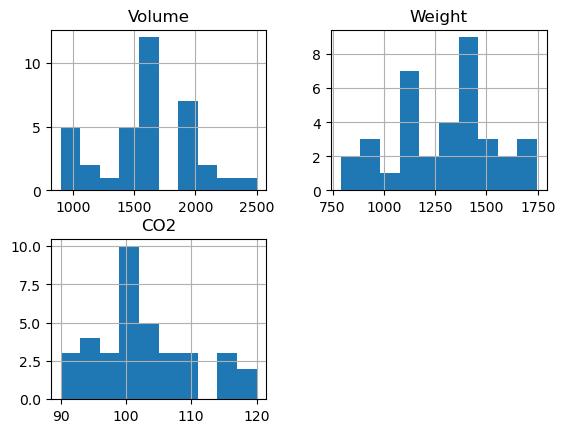

In [222]:
cars_co2.hist()

In [223]:
cars_co2 = cars_co2.loc[:, ['Volume', 'Weight', 'CO2']]
cars_co2

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105
5,1000,929,105
6,1400,1109,90
7,1500,1365,92
8,1500,1112,98
9,1600,1150,99


In [224]:
cars_co2.isna().sum()

Volume    0
Weight    0
CO2       0
dtype: int64

Text(0, 0.5, 'CO2')

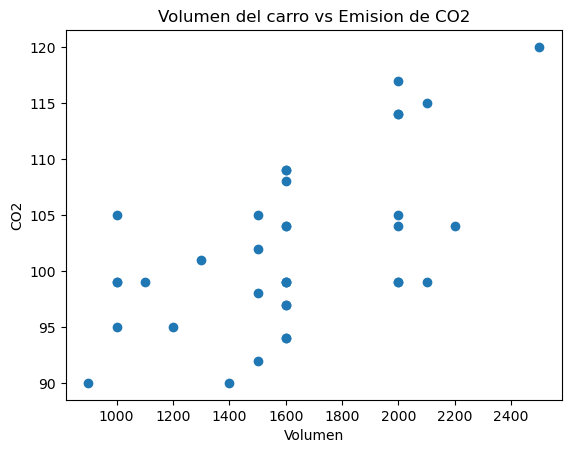

In [225]:
plt.scatter(x = cars_co2['Volume'], y = cars_co2['CO2'])
plt.title('Volumen del carro vs Emision de CO2')
plt.xlabel('Volumen')
plt.ylabel('CO2')

Text(0, 0.5, 'CO2')

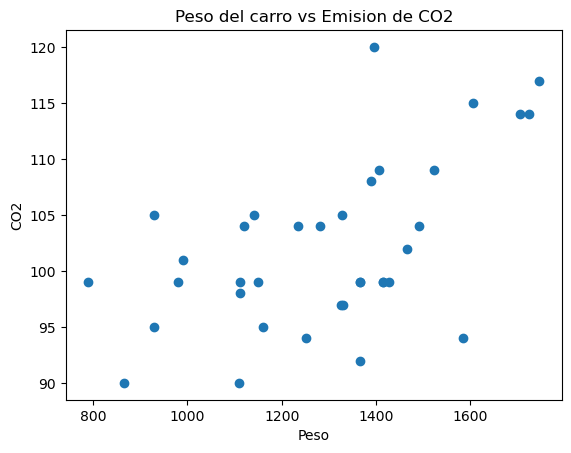

In [226]:
plt.scatter(x = cars_co2['Weight'], y = cars_co2['CO2'])
plt.title('Peso del carro vs Emision de CO2')
plt.xlabel('Peso')
plt.ylabel('CO2')

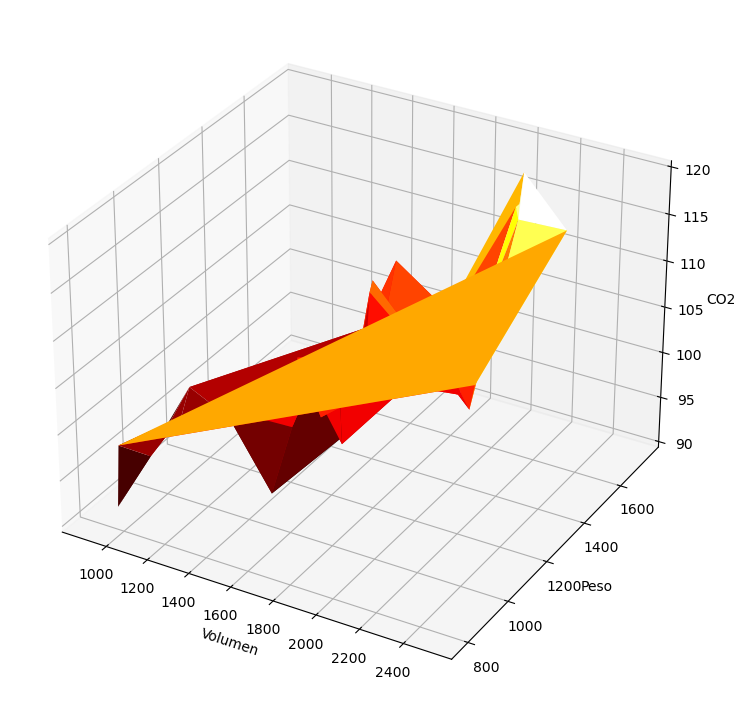

In [227]:
#import random

#def fun(x, y):
#    return x**2 + y

fig = plt.figure( figsize = (16,9) )
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(projection='3d')
# Creating color map
my_cmap = plt.get_cmap('hot')
#x = y = np.arange(-3.0, 3.0, 0.05)
#X, Y = np.meshgrid(x, y)
x = cars_co2['Volume'].values
y = cars_co2['Weight'].values
#X, Y = np.meshgrid(x, y)

#zs = np.array(fun(np.ravel(X), np.ravel(Y)))
#Z = zs.reshape(X.shape)
z = cars_co2['CO2'].values
#Z = zs

trisurf = ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(),
                cmap = my_cmap,
                linewidth = 0.2,
                antialiased = True
               )
#fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5)

ax.set_xlabel('Volumen')
ax.set_ylabel('Peso')
ax.set_zlabel('CO2')
#ax.view_init(2, 50)

plt.show()

In [228]:
X = cars_co2.loc[:, ['Volume', 'Weight']].values
print(X, X.shape)
y_real = cars_co2.loc[:, ['CO2']].values
print(y_real, y_real.shape)

[[1000  790]
 [1200 1160]
 [1000  929]
 [ 900  865]
 [1500 1140]
 [1000  929]
 [1400 1109]
 [1500 1365]
 [1500 1112]
 [1600 1150]
 [1100  980]
 [1300  990]
 [1000 1112]
 [1600 1252]
 [1600 1326]
 [1600 1330]
 [1600 1365]
 [2200 1280]
 [1600 1119]
 [2000 1328]
 [1600 1584]
 [2000 1428]
 [2100 1365]
 [1600 1415]
 [2000 1415]
 [1500 1465]
 [2000 1490]
 [2000 1725]
 [1600 1523]
 [2000 1705]
 [2100 1605]
 [2000 1746]
 [1600 1235]
 [1600 1390]
 [1600 1405]
 [2500 1395]] (36, 2)
[[ 99]
 [ 95]
 [ 95]
 [ 90]
 [105]
 [105]
 [ 90]
 [ 92]
 [ 98]
 [ 99]
 [ 99]
 [101]
 [ 99]
 [ 94]
 [ 97]
 [ 97]
 [ 99]
 [104]
 [104]
 [105]
 [ 94]
 [ 99]
 [ 99]
 [ 99]
 [ 99]
 [102]
 [104]
 [114]
 [109]
 [114]
 [115]
 [117]
 [104]
 [108]
 [109]
 [120]] (36, 1)


In [229]:
X = np.append(X, np.ones(len(X)).reshape(y_real.shape), axis = 1)
X

array([[1.000e+03, 7.900e+02, 1.000e+00],
       [1.200e+03, 1.160e+03, 1.000e+00],
       [1.000e+03, 9.290e+02, 1.000e+00],
       [9.000e+02, 8.650e+02, 1.000e+00],
       [1.500e+03, 1.140e+03, 1.000e+00],
       [1.000e+03, 9.290e+02, 1.000e+00],
       [1.400e+03, 1.109e+03, 1.000e+00],
       [1.500e+03, 1.365e+03, 1.000e+00],
       [1.500e+03, 1.112e+03, 1.000e+00],
       [1.600e+03, 1.150e+03, 1.000e+00],
       [1.100e+03, 9.800e+02, 1.000e+00],
       [1.300e+03, 9.900e+02, 1.000e+00],
       [1.000e+03, 1.112e+03, 1.000e+00],
       [1.600e+03, 1.252e+03, 1.000e+00],
       [1.600e+03, 1.326e+03, 1.000e+00],
       [1.600e+03, 1.330e+03, 1.000e+00],
       [1.600e+03, 1.365e+03, 1.000e+00],
       [2.200e+03, 1.280e+03, 1.000e+00],
       [1.600e+03, 1.119e+03, 1.000e+00],
       [2.000e+03, 1.328e+03, 1.000e+00],
       [1.600e+03, 1.584e+03, 1.000e+00],
       [2.000e+03, 1.428e+03, 1.000e+00],
       [2.100e+03, 1.365e+03, 1.000e+00],
       [1.600e+03, 1.415e+03, 1.00

In [230]:
print(X.shape, y_real.shape)

(36, 3) (36, 1)


In [231]:
mediaX1 = np.mean(X[:,0])
mediaX2 = np.mean(X[:,1])
media = np.zeros((1,2), dtype=float)
media[0][0] = mediaX1
media[0][1] = mediaX2
sigma = np.zeros((1,2), dtype=float)
sigma[0][0] = np.std(X[:,0], ddof=1)
sigma[0][1] = np.std(X[:,1], ddof=1)
print(media)
print(sigma)

[[1611.11111111 1292.27777778]]
[[388.97504715 242.12388932]]


In [237]:
modelo = RegresionLineal()  #Iniciamos el modelo
#w = modelo.GenerarPesos(X)
w = np.array([[8.],[0.],[0.]])
print(w)
print(w.shape)

[[8.]
 [0.]
 [0.]]
(3, 1)


In [233]:
X = modelo.NormalizarCaract(X)
X

array([[-1.5710805 , -2.07446601,  1.        ],
       [-1.0569087 , -0.5463227 ,  1.        ],
       [-1.5710805 , -1.50037974,  1.        ],
       [-1.8281664 , -1.76470723,  1.        ],
       [-0.285651  , -0.62892504,  1.        ],
       [-1.5710805 , -1.50037974,  1.        ],
       [-0.5427369 , -0.75695867,  1.        ],
       [-0.285651  ,  0.30035129,  1.        ],
       [-0.285651  , -0.74456832,  1.        ],
       [-0.0285651 , -0.58762387,  1.        ],
       [-1.3139946 , -1.28974377,  1.        ],
       [-0.7998228 , -1.2484426 ,  1.        ],
       [-1.5710805 , -0.74456832,  1.        ],
       [-0.0285651 , -0.16635194,  1.        ],
       [-0.0285651 ,  0.13927672,  1.        ],
       [-0.0285651 ,  0.15579719,  1.        ],
       [-0.0285651 ,  0.30035129,  1.        ],
       [ 1.5139503 , -0.05070866,  1.        ],
       [-0.0285651 , -0.7156575 ,  1.        ],
       [ 0.9997785 ,  0.14753696,  1.        ],
       [-0.0285651 ,  1.20484692,  1.   

# Entrenar el modelo descenso del gradiente

In [238]:
(w, ECM) = modelo.Entrenar(X,y_real,w, ra=0.025, iterar = 200)
ECM = np.append(ECM, modelo.ECM(y_real,y_pred))
print(ECM)

[5228.62943096 4971.25814706 4726.60523878 4494.04175799 4272.96989353
 4062.82142695 3863.05626501 3673.1610452  3492.64781057 3321.0527505
 3157.93500398 3002.87552235 2855.47598861 2715.35779032 2582.16104356
 2455.54366528 2335.18049177 2220.76244081 2111.99571547 2008.60104728
 1910.3129771  1816.87917152 1728.05977321 1643.6267835  1563.36347552
 1487.06383645 1414.53203742 1345.58192963 1280.03656549 1217.72774347
 1158.49557544 1102.18807551 1048.66076922  997.776322    949.40418615
  903.4202652   859.70659491  818.15104011  778.64700643  741.09316646
  705.39319928  671.45554302  639.19315957  608.52331102  579.36734705
  551.65050293  525.30170747  500.25340047  476.44135919  453.80453346
  432.28488883  411.82725762  392.37919719  373.89085533  356.31484226
  339.60610892  323.72183137  308.62130084  294.26581918  280.61859957
  267.6446721   255.31079396  243.58536416  232.43834241  221.84117202
  211.76670659  202.18914039  193.08394208  184.42779182  176.19852138
  168.3

In [239]:
w

array([[  4.05747377],
       [  0.80735794],
       [101.3826562 ]])

In [240]:
prueba = np.array([1000, 790, 1], dtype=float)
prueba = modelo.Normalizar_una_Caract(prueba, media, sigma)
predic = modelo.predecir(prueba,w)
predic

array([[93.33320167]])

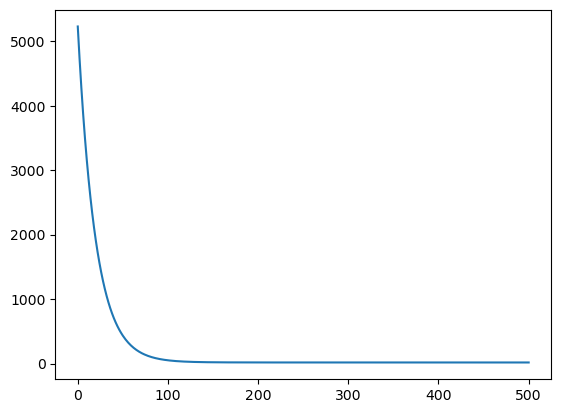

In [216]:
plt.plot(ECM)

In [286]:
y_pred = modelo.predecir(X, w)
y_pred

array([[-1.14449247e+01],
       [-7.81904493e+00],
       [-1.15811205e+01],
       [-1.35126193e+01],
       [-1.81682537e+00],
       [-1.15811205e+01],
       [-3.78065845e+00],
       [-2.03728623e+00],
       [-1.78939025e+00],
       [ 1.67584046e-01],
       [-9.63688393e+00],
       [-5.65826683e+00],
       [-1.17604286e+01],
       [ 6.76417921e-02],
       [-4.86533320e-03],
       [-8.78463727e-03],
       [-4.30785479e-02],
       [ 1.20054527e+01],
       [ 1.97958652e-01],
       [ 7.97000573e+00],
       [-2.57660446e-01],
       [ 7.87202313e+00],
       [ 9.92795985e+00],
       [-9.20698488e-02],
       [ 7.88476087e+00],
       [-2.13526883e+00],
       [ 7.81127392e+00],
       [ 7.58101481e+00],
       [-1.97891059e-01],
       [ 7.60061133e+00],
       [ 9.69280161e+00],
       [ 7.56043846e+00],
       [ 8.42988344e-02],
       [-6.75741983e-02],
       [-8.22715886e-02],
       [ 1.78753958e+01]])

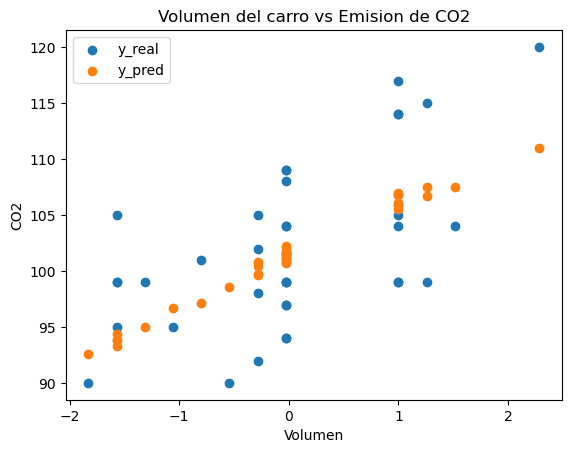

In [242]:
plt.scatter(X[:,0], y_real)
plt.scatter(X[:,0], y_pred)
plt.title('Volumen del carro vs Emision de CO2')
plt.xlabel('Volumen')
plt.ylabel('CO2')
plt.legend(['y_real', 'y_pred'])

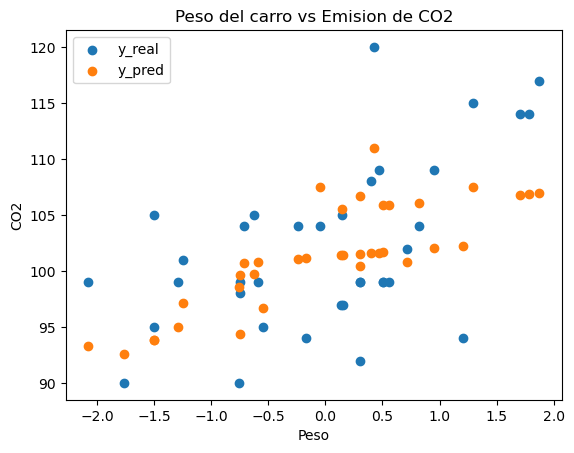

In [243]:
plt.scatter(X[:,1], y_real)
plt.scatter(X[:,1], y_pred)
plt.title('Peso del carro vs Emision de CO2')
plt.xlabel('Peso')
plt.ylabel('CO2')
plt.legend(['y_real', 'y_pred'])

# Momento

In [252]:
modelo2 = RegresionLineal()
w = np.array([[8.],[0.],[0.]])
w

array([[8.],
       [0.],
       [0.]])

In [253]:
(w, ECM) = modelo2.EntrenarMomento(X, y_real, w, ra=0.025, momento=0.9, iterar=200)

In [254]:
print(w)

[[  3.03603309]
 [  1.82819874]
 [102.0261025 ]]


In [255]:
prueba = np.array([1000, 790, 1], dtype=float)
prueba = modelo.Normalizar_una_Caract(prueba, media, sigma)
predic = modelo.predecir(prueba,w)
predic

array([[93.46371397]])

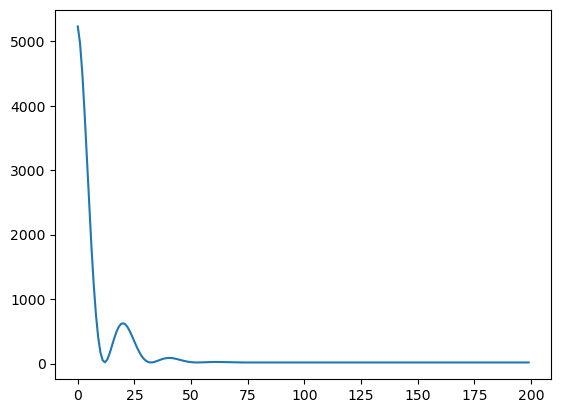

In [256]:
plt.plot(ECM)

In [257]:
ECM

array([5228.62943096, 4971.25814706, 4506.26928414, 3895.91792115,
       3206.46790999, 2500.95779176, 1833.6678068 , 1246.4857463 ,
        767.15233413,  409.1928423 ,  173.21903624,   49.21617028,
         19.41005334,   61.33158649,  150.75049805,  264.22502968,
        381.09900026,  484.86213485,  563.86583526,  611.44902971,
        625.5741034 ,  608.10015859,  563.83087058,  499.46934341,
        422.59593149,  340.76074795,  260.75430729,  188.0908884 ,
        126.71258633,   78.8997292 ,   45.35664237,   25.43115033,
         17.42154866,   18.92536137,   27.188968  ,   39.42489514,
         53.07293269,   65.9910618 ,   76.57145797,   83.78479188,
         87.16219531,   86.72835677,   82.90126476,   76.3743203 ,
         67.99522644,   58.65364032,   49.1864823 ,   40.30645197,
         32.55606651,   26.28669573,   21.6598131 ,   18.66611577,
         17.15730562,   16.88511618,   17.54251304,   18.80275197,
         20.35299953,   21.92036013,   23.2892801 ,   24.31031

In [258]:
y_pred = modelo2.predecir(X, w)

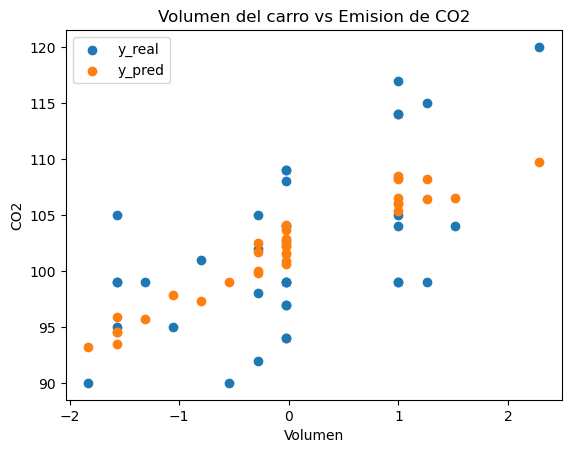

In [259]:
plt.scatter(X[:,0], y_real)
plt.scatter(X[:,0], y_pred)
plt.title('Volumen del carro vs Emision de CO2')
plt.xlabel('Volumen')
plt.ylabel('CO2')
plt.legend(['y_real', 'y_pred'])

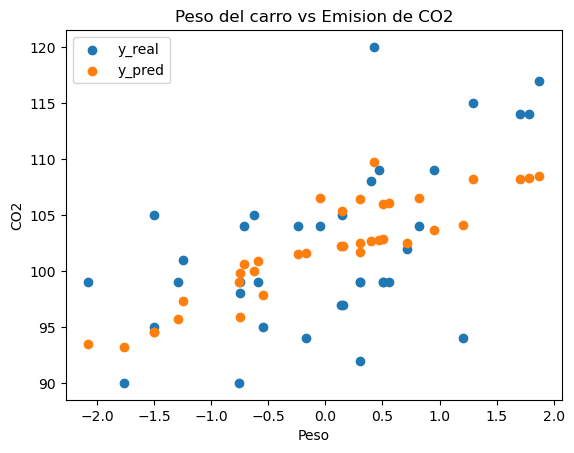

In [260]:
plt.scatter(X[:,1], y_real)
plt.scatter(X[:,1], y_pred)
plt.title('Peso del carro vs Emision de CO2')
plt.xlabel('Peso')
plt.ylabel('CO2')
plt.legend(['y_real', 'y_pred'])

# RMSPROP

In [524]:
modelo3 = RegresionLineal()
w = np.array([[8.],[0.],[0.]])
w

array([[8.],
       [0.],
       [0.]])

In [525]:
(w, ECM) = modelo3.EntrenarRMSPROP(X, y_real, w, ra=0.5, iterar=20000)

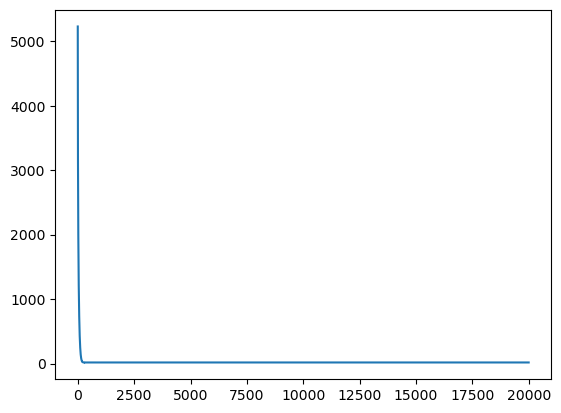

In [526]:
plt.plot(ECM)

In [527]:
w

array([[  2.786051  ],
       [  1.57826531],
       [102.27777678]])

In [528]:
ECM

array([5228.62943096, 4746.88202043, 4398.85221147, ...,   16.97919649,
         16.97919649,   16.97919649])

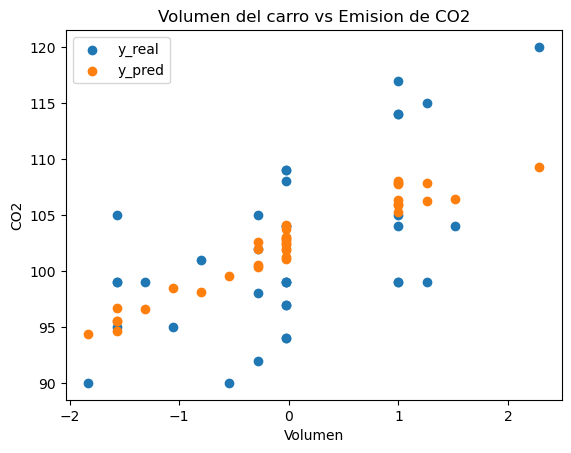

In [529]:
y_pred = modelo2.predecir(X, w)
plt.scatter(X[:,0], y_real)
plt.scatter(X[:,0], y_pred)
plt.title('Volumen del carro vs Emision de CO2')
plt.xlabel('Volumen')
plt.ylabel('CO2')
plt.legend(['y_real', 'y_pred'])

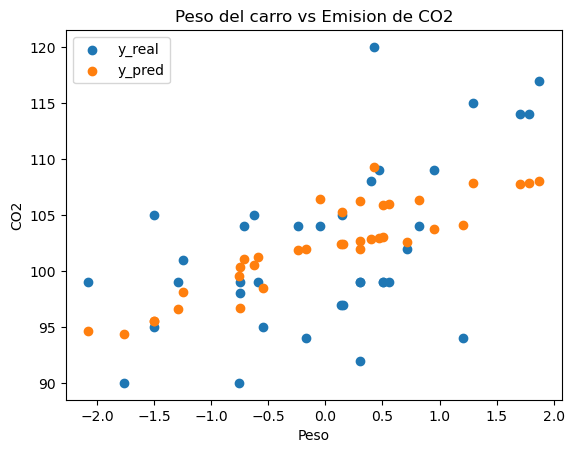

In [530]:
plt.scatter(X[:,1], y_real)
plt.scatter(X[:,1], y_pred)
plt.title('Peso del carro vs Emision de CO2')
plt.xlabel('Peso')
plt.ylabel('CO2')
plt.legend(['y_real', 'y_pred'])

# ADAM

In [531]:
modelo4 = RegresionLineal()
w = np.array([[8.],[0.],[0.]])
w

array([[8.],
       [0.],
       [0.]])

In [532]:
(w, ECM) = modelo4.EntrenarADAM(X, y_real, w, ra=0.25, iterar=200000)

In [533]:
ECM

array([5228.62943096, 5228.54454607, 5228.42144851, ...,   39.74204845,
         39.90968789,   40.07320296])

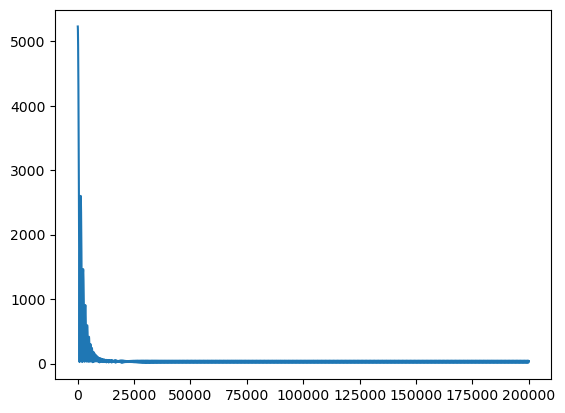

In [534]:
plt.plot(ECM)

In [535]:
w

array([[-0.26996847],
       [-1.47775417],
       [98.94302685]])

In [536]:
ECM

array([5228.62943096, 5228.54454607, 5228.42144851, ...,   39.74204845,
         39.90968789,   40.07320296])

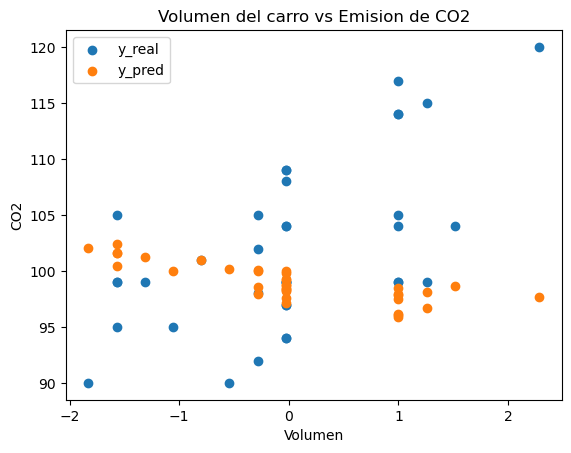

In [538]:
y_pred = modelo4.predecir(X, w)
plt.scatter(X[:,0], y_real)
plt.scatter(X[:,0], y_pred)
plt.title('Volumen del carro vs Emision de CO2')
plt.xlabel('Volumen')
plt.ylabel('CO2')
plt.legend(['y_real', 'y_pred'])

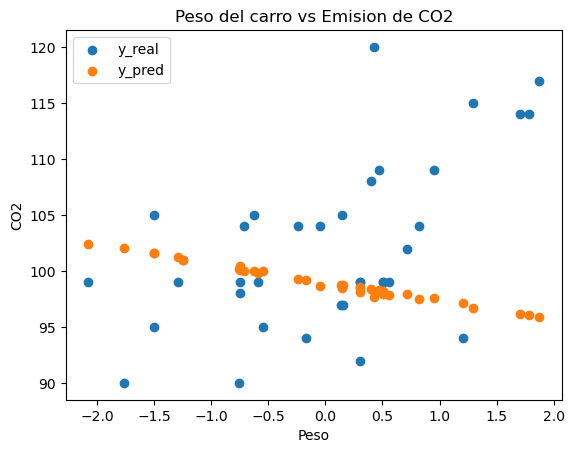

In [539]:
plt.scatter(X[:,1], y_real)
plt.scatter(X[:,1], y_pred)
plt.title('Peso del carro vs Emision de CO2')
plt.xlabel('Peso')
plt.ylabel('CO2')
plt.legend(['y_real', 'y_pred'])